In [2]:
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [5]:
# create the link between you and the IRIS-DMC
client    = Client('IRIS')
s1 = obspy.UTCDateTime(2013,5,24,5,45,8)  
# collect the information about what data is available
tr = client.get_waveforms(network="XL",station="HD62",channel="HHZ",location="*",starttime=s1,endtime=s1+7200)


In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# this gives you the dt or frequency of sampling in the digitial seismogram
print(tr[0].stats.delta)
print(tr[0].stats.sampling_rate)

0.01
100.0


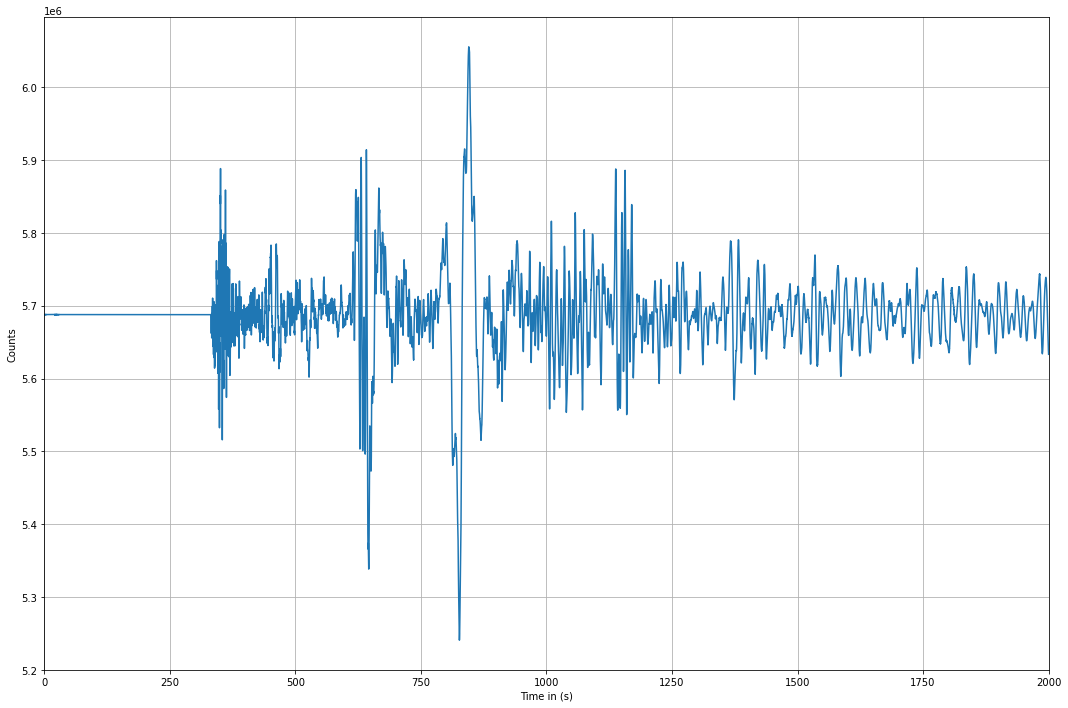

In [23]:
# create a time vector to plot the data
t=np.linspace(0,7200,int(7200/tr[0].stats.delta))


plt.rcParams["figure.figsize"] = (18,12)
plt.plot(t,tr[0].data)
plt.xlabel('Time in (s)')
plt.ylabel('Counts')
plt.xlim([0,2000])
plt.grid(True)

In [29]:
# here we will filter data!

crap=tr[0].copy()
crap = crap.filter('bandpass',freqmin=0.001,freqmax=0.05) # 0.001Bz - > 0.05Hz  / periods 20s- 1000s


crap2=tr[0].copy()
crap2 = crap2.filter('bandpass',freqmin=0.05,freqmax=5) # 0.05Hz -> 5Hz / periods 20s - 0.2s

print(crap.data)

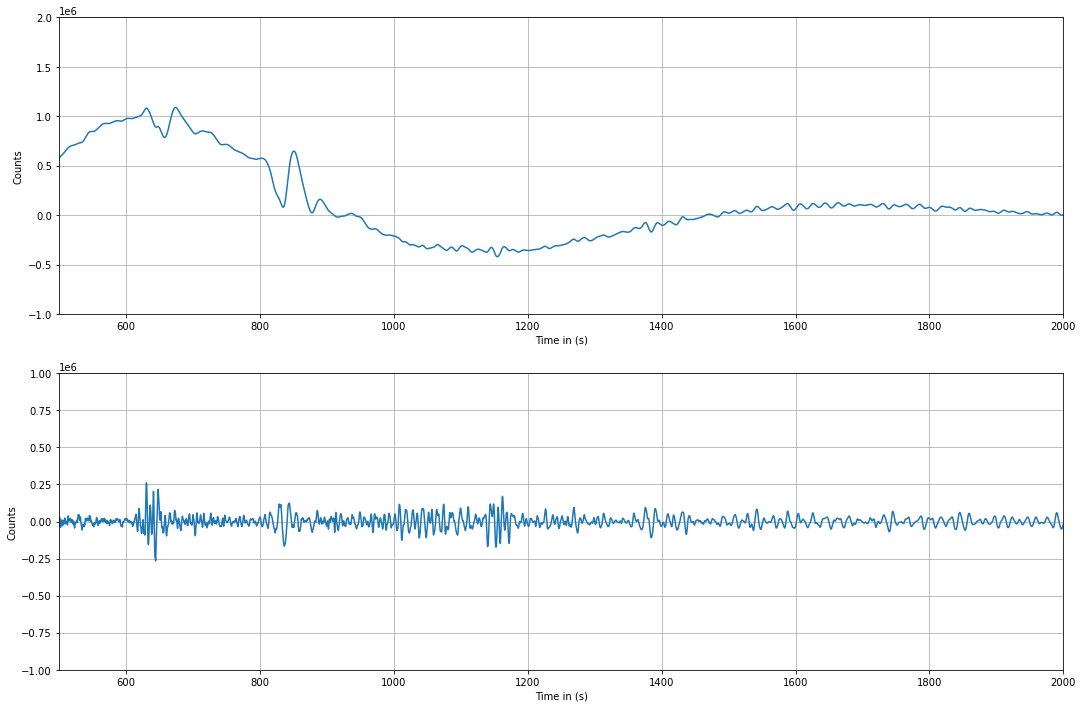

In [42]:

fig,ax=plt.subplots(2,1)
ax[0].plot(t,crap.data)
ax[0].set_xlabel('Time in (s)')
ax[0].set_ylabel('Counts')
ax[0].set_xlim([500,2000])
ax[0].set_ylim([-1e6,2e6])
ax[0].grid(True)



ax[1].plot(t,crap2.data)
ax[1].set_xlabel('Time in (s)')
ax[1].set_ylabel('Counts')
ax[1].set_xlim([500,2000])
ax[1].set_ylim([-1e6,1e6])
ax[1].grid(True)